In [ ]:
import numpy as np

In [ ]:
W1 = np.random.randn(2, 2) * 0.01
print(W1)

In [ ]:
import numpy as np

# XOR data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(s):
    # s = sigmoid(x)
    return s * (1 - s)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(2, 2) * 0.01
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) * 0.01
b2 = np.zeros((1, 1))

# Training parameters
learning_rate = 0.1
max_epochs = 10000
loss_threshold = 0.01

# Training loop
for epoch in range(max_epochs):
    # ----- FORWARD PASS -----
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Output prediction (y_hat)

    # ----- LOSS (Binary Cross-Entropy) -----
    m = y.shape[0]
    loss = -np.mean(y * np.log(A2 + 1e-8) + (1 - y) * np.log(1 - A2 + 1e-8))

    # Optional: print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")

    # ----- TERMINATION -----
    if loss < loss_threshold:
        print(f"Training stopped at epoch {epoch}, Loss: {loss:.5f}")
        break

    # ----- BACKPROPAGATION -----
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # ----- UPDATE WEIGHTS -----
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Final predictions
Z1 = np.dot(X, W1) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
y_pred = sigmoid(Z2)

print("\nFinal Predictions (after training):")
print(*np.round(y_pred))
print("Actual value of y:")
print(*np.round(y))

predictions = (y_pred > 0.5).astype(int)
accuracy = np.mean(predictions == y)
print(f"\nAccuracy: {accuracy * 100:.2f}%")



In [ ]:
def predict(x):
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.round(a2)

# Try new input
print("Predict [1, 1]:", predict(np.array([[1, 1]])))
print("Predict [0, 1]:", predict(np.array([[0, 1]])))


In [ ]:
# I used sigmoid activation function for hidden layer and output
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(m,w1,w2,z1,a1,z2,a2,y):

    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1


Loss:  [np.float64(0.25602174652058807), np.float64(0.25411849740713055), np.float64(0.2527756932149242), np.float64(0.25183739535234545), np.float64(0.2511862422878013), np.float64(0.2507364793551695), np.float64(0.2504267308762665), np.float64(0.250213706802181), np.float64(0.2500671888772008), np.float64(0.24996623977509771), np.float64(0.24989643033243095), np.float64(0.2498478553987038), np.float64(0.2498137349955431), np.float64(0.24978943826152464), np.float64(0.24977180734860466), np.float64(0.24975869153304736), np.float64(0.24974862739861675), np.float64(0.24974061990846927), np.float64(0.249733992854641), np.float64(0.249728286863388), np.float64(0.24972318992057851), np.float64(0.24971849009499375), np.float64(0.24971404339258418), np.float64(0.24970975191326097), np.float64(0.24970554901643618), np.float64(0.2497013892511501), np.float64(0.24969724152325856), np.float64(0.24969308446076313), np.float64(0.24968890327114293), np.float64(0.2496846876109981), np.float64(0.249

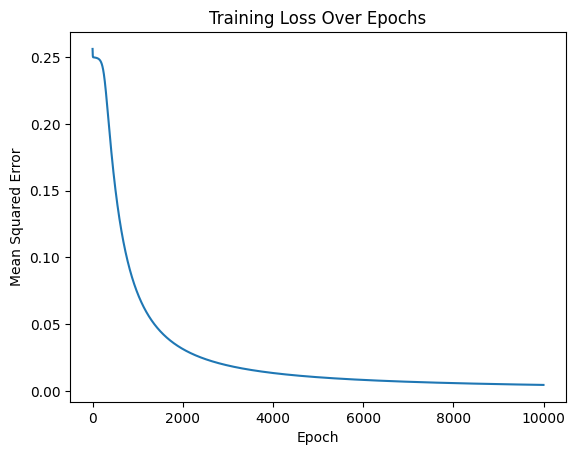

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network class
# The order of parameters should be input_size followed by hidden_size for the first weight matrix,
# and hidden_size followed by output_size for the second weight matrix.
# This is based on the structure of the neural network where the input layer connects to the hidden layer, and the hidden layer connects to the output layer.
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)

# Define the forward pass and training methods
    def forward(self, inputs):
        hidden_input = np.dot(inputs, self.weights_input_hidden)
        hidden_output = sigmoid(hidden_input) # activation function
        output_input = np.dot(hidden_output, self.weights_hidden_output) # weighted sum
        output = sigmoid(output_input)
        return output

# Define the backpropagation method for training
# The train method combines forward propagation, error calculation, backpropagation, and weight update,
# which are the key components of the gradient descent optimization process.
# The weights are iteratively adjusted using this process over multiple epochs to
# gradually improve the network's ability to make accurate predictions.
    def train(self, inputs, targets, epochs):
        loss_history = [] # keep track of loss over epochs
        for _ in range(epochs): # train for a fixed number of epochs
            hidden_input = np.dot(inputs, self.weights_input_hidden) # weighted sum
            hidden_output = sigmoid(hidden_input) # activation function
            output_input = np.dot(hidden_output, self.weights_hidden_output)
            output = sigmoid(output_input)
            error = targets - output # compute error
            d_output = error * sigmoid_derivative(output)
            error_hidden = d_output.dot(self.weights_hidden_output.T) # backpropagate error
            d_hidden = error_hidden * sigmoid_derivative(hidden_output) # compute gradients
            self.weights_hidden_output += hidden_output.T.dot(d_output) # update weights
            self.weights_input_hidden += inputs.T.dot(d_hidden)
            loss = np.mean(np.square(error)) # compute loss
            loss_history.append(loss) # keep track of loss over epochs
        return loss_history

# Example usage
if __name__ == "__main__":
    nn = NeuralNetwork(input_size = 2, hidden_size = 2, output_size = 1) # create neural network

    training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # XOR problem In the XOR problem, the goal is to train a neural network to correctly output the XOR (exclusive OR) of two binary inputs.
    training_targets = np.array([[0], [1], [1], [0]])

    epochs = 10000 # train for 10000 epochs
    loss_history = nn.train(training_inputs, training_targets, epochs) # train neural network
    print("\nLoss: ", loss_history)

    test_input = np.array([[0, 0]]) # test neural network
    predicted_output = nn.forward(test_input) # make prediction

    # Test the trained network on all inputs
    for test_input in training_inputs:
        predicted_output = nn.forward(test_input)
        expected_output = training_targets[np.where((training_inputs == test_input).all(axis=1))[0][0]]
        print(f"Input: {test_input}, Predicted Output: {predicted_output}, Expected Output: {expected_output}")

    plt.plot(range(epochs), loss_history) # plot loss over epochs
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.title("Training Loss Over Epochs")
    plt.show()

In [10]:
def predict(x, model):
    z1 = np.dot(x, model.weights_input_hidden)
    a1 = sigmoid(z1)
    z2 = np.dot(a1, model.weights_hidden_output)
    a2 = sigmoid(z2)
    return np.round(a2)

# Train your model as before
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)
nn.train(training_inputs, training_targets, epochs=10000)

# Predict using external function
print("Predict [1, 1]:", predict(np.array([[1, 1]]), nn))
print("Predict [0, 1]:", predict(np.array([[0, 1]]), nn))
print("Predict [1, 0]:", predict(np.array([[1, 0]]), nn))
print("Predict [0, 0]:", predict(np.array([[0, 0]]), nn))


Predict [1, 1]: [[0.]]
Predict [0, 1]: [[1.]]
Predict [1, 0]: [[1.]]
Predict [0, 0]: [[0.]]
